In [1]:
# Basic Libraries
import pandas as pd
import numpy as np

# Sklearn Modules
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
# Load data
df = pd.read_csv("travel_blogging_dataset.csv")

# Preview data
df.head()


,Blog_ID,Blogger_Name,Blog_Title,Destination,Days_to_Plan,Blog_Post_Date,Average_Blog_Rating,Trip_Cost_Saved($),Readers_Count,Helpfulness_Score,...,Average_Trip_Duration(Days),Traveler_Age_Group,Blog_Category,Likes_Count,Comments_Count,Average_Time_Spent_Reading(Minutes),Country,Traveler_Economy_Status($),Video_Blogging,User_Planned_Trip
0,1,Jeremiah Walsh,View resource claim air suffer ball.,Buchanantown,4,2020-06-29,2.95,238.98,3834,9.56,...,6,46-60,Family,512,76,23,Guyana,458682.02,Yes,Yes
1,2,Michelle Johnson,Full inside quickly official.,East Biancaborough,13,2024-05-18,4.89,266.96,4626,3.37,...,9,26-35,Family,192,380,21,Korea,674403.18,Yes,Yes
2,3,Colleen Guzman,Process middle into family sense.,South Joan,7,2020-09-30,3.66,289.37,190,3.68,...,5,26-35,Budget,1309,475,13,Sierra Leone,973005.02,Yes,Yes
3,4,Melissa Patel,Special strategy owner fish page move.,Timothybury,2,2023-10-20,2.91,197.37,2795,3.35,...,7,26-35,Romantic,961,362,18,Anguilla,764167.17,Yes,Yes
4,5,Lawrence Spears,Prevent sound small especially also.,Jennifertown,16,2020-08-31,2.36,258.72,3398,1.25,...,7,60+,Family,1766,206,12,Croatia,43889.66,Yes,Yes


In [4]:
# Check for null values
print(df.isnull().sum())

# Drop rows with missing values (if any)
df = df.dropna()

# Rename columns for simplicity (edit according to your dataset)
df = df.rename(columns={"Blog_Text": "text", "Category": "label"})


Blog_ID                                0
Blogger_Name                           0
Blog_Title                             0
Destination                            0
Days_to_Plan                           0
Blog_Post_Date                         0
Average_Blog_Rating                    0
Trip_Cost_Saved($)                     0
Readers_Count                          0
Helpfulness_Score                      0
Blog_Length(Words)                     0
Transportation_Mode                    0
Average_Trip_Duration(Days)            0
Traveler_Age_Group                     0
Blog_Category                          0
Likes_Count                            0
Comments_Count                         0
Average_Time_Spent_Reading(Minutes)    0
Country                                0
Traveler_Economy_Status($)             0
Video_Blogging                         0
User_Planned_Trip                      0
dtype: int64


Accuracy: 0.1353258613532586

Classification Report:
               precision    recall  f1-score   support

   Adventure       0.14      0.16      0.15       352
      Budget       0.16      0.15      0.16       346
    Cultural       0.12      0.13      0.12       342
      Family       0.11      0.08      0.09       322
      Luxury       0.13      0.13      0.13       350
    Romantic       0.15      0.15      0.15       356
        Solo       0.13      0.14      0.13       341

    accuracy                           0.14      2409
   macro avg       0.13      0.13      0.13      2409
weighted avg       0.13      0.14      0.13      2409



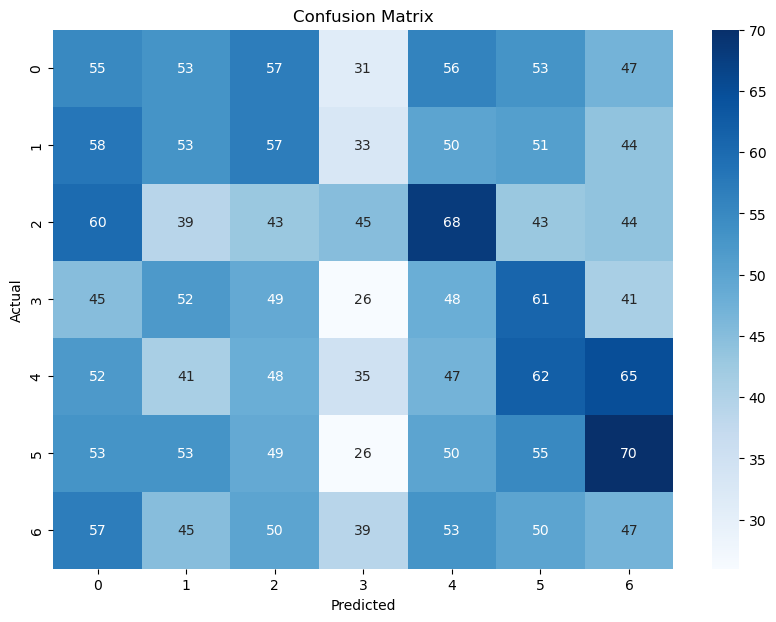

In [6]:
# Features (Blog content) -> Let's use Blog_Title for categorization
X = df["Blog_Title"]

# Target (labels) -> Blog_Category
y = df["Blog_Category"]

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=300)
model.fit(X_train_vec, y_train)

# Predictions
y_pred = model.predict(X_test_vec)

# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



In [7]:
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [8]:
model = LogisticRegression(max_iter=300)
model.fit(X_train_vec, y_train)

# Predictions
y_pred = model.predict(X_test_vec)


Accuracy: 0.1353258613532586

Classification Report:
               precision    recall  f1-score   support

   Adventure       0.14      0.16      0.15       352
      Budget       0.16      0.15      0.16       346
    Cultural       0.12      0.13      0.12       342
      Family       0.11      0.08      0.09       322
      Luxury       0.13      0.13      0.13       350
    Romantic       0.15      0.15      0.15       356
        Solo       0.13      0.14      0.13       341

    accuracy                           0.14      2409
   macro avg       0.13      0.13      0.13      2409
weighted avg       0.13      0.14      0.13      2409



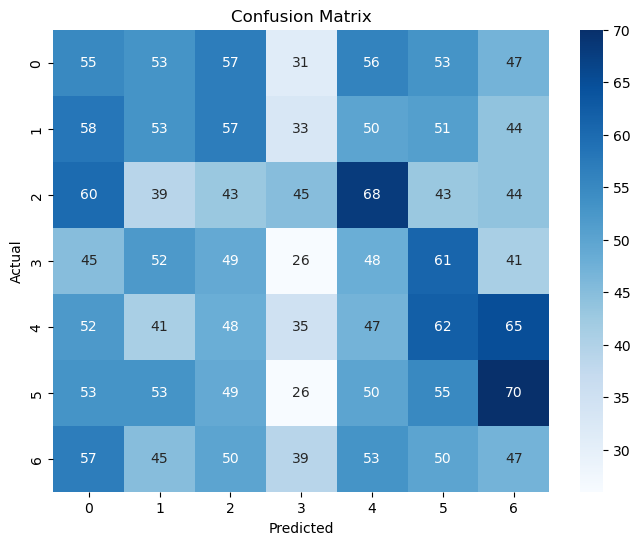

In [9]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [10]:
new_blog = ["Trekking in the Himalayas was thrilling and adventurous",
            "Relaxing on the beaches of Goa was refreshing",
            "The ancient temples of Varanasi show rich Indian culture"]

new_blog_vec = vectorizer.transform(new_blog)
print("Predictions:", model.predict(new_blog_vec))


Predictions: ['Adventure' 'Adventure' 'Adventure']


In [11]:
import pickle

# Save vectorizer & model
pickle.dump(vectorizer, open("tfidf_vectorizer.pkl", "wb"))
pickle.dump(model, open("tourism_logreg_model.pkl", "wb"))

# Load later when needed
loaded_model = pickle.load(open("tourism_logreg_model.pkl", "rb"))
